<a href="https://colab.research.google.com/github/delazaro/Patrones/blob/main/InvCorta2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INVESTIGACION CORTA #2

Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle InvCorta-2.ipynb, con las librerıas que considere oportuno, en especial debe contar con PANDAS. El objetivo consiste en crear una notebook,
donde a partir de un dataset de su eleccion, pueda llevar a cabo diferentes tecnicas de pre-procesado, ası como analisis exploratorio de los datos. Debe tener como mınimo las siguientes tecnicas (no se limita a
estos):

• Aplicacion de normalizaci´on o estandarizaci´on de datos.

• Tecnica de sustituci´on de valores faltantes.

• Tecnica de detecci´on/eliminaci´on de outliers.

• Analisis exploratorio de datos.

• Sientase en libertad de agregar cualquier “truco” que considere oportuno!

Si el dataset elegido no le permite usar alguna de las tecnicas establecidas como mınimas, puede crear un arreglo de datos que le permita comprobar el uso de esa tecnica en cuestion.

Seleccionando data Set 

Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision

Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision



Cargando librerias necesarias asi como al set de datos seleccionado y visualizando primeros datos del data set

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


candidates_data = pd.read_csv("https://raw.githubusercontent.com/delazaro/Patrones/530a2ececc9ee5f54397c68a1c31a5d0487e563c/aug_test.csv")

candidates_data.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


Visualizando los ultimos datos del data set 

In [69]:
candidates_data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84
2128,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11


Normalizando datos de las columnas 

Se decide remover los datos que no se van a analizar del dataset 

In [57]:
candidates_data.drop(columns='enrolled_university',inplace=True)
candidates_data.drop(columns='city_development_index',inplace=True)
candidates_data.drop(columns='major_discipline',inplace=True)
candidates_data.drop(columns='experience',inplace=True)
candidates_data.drop(columns='training_hours',inplace=True)
candidates_data.drop(columns='company_type',inplace=True)
candidates_data.drop(columns='company_size',inplace=True)

candidates_data.head()


,enrollee_id,city,gender,relevent_experience,education_level,last_new_job
0,32403,city_41,Male,Has relevent experience,Graduate,1
1,9858,city_103,Female,Has relevent experience,Graduate,1
2,31806,city_21,Male,No relevent experience,High School,never
3,27385,city_13,Male,Has relevent experience,Masters,1
4,27724,city_103,Male,Has relevent experience,Graduate,>4


In [72]:
# Se decide normalizar solamente los datos a analizar 

#Normalizando datos de genero , cualquier genero no identificado se asume Male por defecto . 
candidates_data.gender.replace(to_replace=('Male','','Other'), value = 1.0 , inplace= True)
candidates_data.gender.replace(to_replace='Female', value = 0.0 , inplace= True)

#Normalizando datos de experiencia . 
candidates_data.relevent_experience.replace(to_replace='Has relevent experience', value = 1.0 , inplace= True)
candidates_data.relevent_experience.replace(to_replace='No relevent experience', value = 0.0 , inplace= True)

#Normalizando datos de nivel de educacion. No profesional es catalogado 0 , profesional 1 
candidates_data.education_level.replace(to_replace=('Graduate','Masters','Phd'), value = 1.0 , inplace= True)
candidates_data.education_level.replace(to_replace=('High School','Primary School',''), value = 0.0 , inplace= True)

#Normalizando datos de nivel de tiempo en ultimo trabajo. Mayor a 4 se califa como 1, los demas como 0  
candidates_data.last_new_job.replace(to_replace='>4', value = 1.0 , inplace= True)
candidates_data.last_new_job.replace(to_replace=('0','1','2','3','never','4'), value=0,inplace=True)

candidates_data.head()



,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,1.0,1.0,Full time course,1.0,STEM,9,<10,NaN,0.0,21
1,9858,city_103,0.920,0.0,1.0,no_enrollment,1.0,STEM,5,NaN,Pvt Ltd,0.0,98
2,31806,city_21,0.624,1.0,0.0,no_enrollment,0.0,NaN,<1,NaN,Pvt Ltd,0.0,15
3,27385,city_13,0.827,1.0,1.0,no_enrollment,1.0,STEM,11,Oct-49,Pvt Ltd,0.0,39
4,27724,city_103,0.920,1.0,1.0,no_enrollment,1.0,STEM,>20,10000+,Pvt Ltd,1.0,72


Revisando candidatos por genero y experiencia relevante 

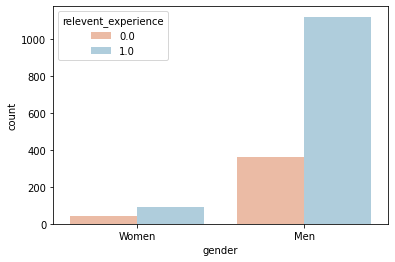

In [73]:
plt.figure()
sns.countplot(x='gender', hue='relevent_experience', data=candidates_data, palette='RdBu')
plt.xticks([0,1], ['Women','Men'])
plt.show()

Revisando candidatos por niveles de educacion y experiencia relevante

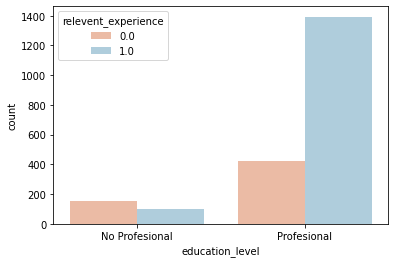

In [67]:
plt.figure()
sns.countplot(x='education_level', hue='relevent_experience', data=candidates_data, palette='RdBu')
plt.xticks([0,1], ['No Profesional','Profesional'])
plt.show()

Del analisis se obtiene que tanto los profesionales hombres con experiencia relevante son candidatos con mayor probabilidad de trabajar para la empresa. 